In [1]:
import pandas as pd
import numpy as np

df= pd.read_csv(r"C:\Users\szoya\Downloads\web_scrapping\amazon_laptops_data.csv")

In [2]:
df

,Brand,OS,Storage_capacity,Discount_price,original_price,Discount,Rating,Num_of_rating
0,Acer,Windows 11,512GB,"₹65,990","89,999",27.0,5.0,4
1,Acer,Windows 11,512GB,"₹74,990",NaN,26.0,4.4,12
2,Acer,Win11,512 GB,"₹20,819","33,999",39.0,3.4,88
3,Dell,Window 11,512GB,"₹31,990","48,692",34.0,3.7,484
4,Lenovo,Windows 11,NaN,NaN,NaN,NaN,3.4,14
...,...,...,...,...,...,...,...,...
431,Dell,Win 11,512GB,"₹97,990",NaN,16.0,3.4,68
432,Lenovo,Windows 11,512GB,"₹83,990",NaN,32.0,4.1,123
433,MSI,Windows 11,NaN,NaN,NaN,25.0,4.0,743
434,Lenovo,Win 11,512GB,NaN,NaN,NaN,4.0,321


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             436 non-null    object 
 1   OS                380 non-null    object 
 2   Storage_capacity  346 non-null    object 
 3   Discount_price    381 non-null    object 
 4   original_price    302 non-null    object 
 5   Discount          433 non-null    float64
 6   Rating            436 non-null    float64
 7   Num_of_rating     436 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 27.4+ KB


In [7]:
df["Discount_price"] = df["Discount_price"].apply(lambda x :str(x).replace("₹",""))

In [9]:
df["Discount_price"] = df["Discount_price"].apply(lambda x :str(x).replace(",",""))

In [11]:
df["original_price"] = df["original_price"].apply(lambda x :str(x).replace(",",""))

In [13]:
df["Discount_price"] = df["Discount_price"].astype("float")

In [15]:
df["original_price"] = df["original_price"].astype("float")

In [17]:
df['OS'] = df['OS'].replace({
    'Win 11': 'Windows 11',
    'Win11': 'Windows 11',
    'Window 11': 'Windows 11',
    'Windows11': 'Windows 11'
})

In [19]:
df['Storage_capacity'] = df['Storage_capacity'].replace({
    '512 GB': '512GB',
    '256 GB': '256GB',
    '1 TB': '1TB'
})

In [21]:
df

,Brand,OS,Storage_capacity,Discount_price,original_price,Discount,Rating,Num_of_rating
0,Acer,Windows 11,512GB,65990.0,89999.0,27.0,5.0,4
1,Acer,Windows 11,512GB,74990.0,NaN,26.0,4.4,12
2,Acer,Windows 11,512GB,20819.0,33999.0,39.0,3.4,88
3,Dell,Windows 11,512GB,31990.0,48692.0,34.0,3.7,484
4,Lenovo,Windows 11,NaN,NaN,NaN,NaN,3.4,14
...,...,...,...,...,...,...,...,...
431,Dell,Windows 11,512GB,97990.0,NaN,16.0,3.4,68
432,Lenovo,Windows 11,512GB,83990.0,NaN,32.0,4.1,123
433,MSI,Windows 11,NaN,NaN,NaN,25.0,4.0,743
434,Lenovo,Windows 11,512GB,NaN,NaN,NaN,4.0,321


In [23]:
df.duplicated().sum()

2

In [25]:
df = df.drop_duplicates()

In [27]:
df.isnull().sum()

Brand                 0
OS                   56
Storage_capacity     90
Discount_price       54
original_price      133
Discount              3
Rating                0
Num_of_rating         0
dtype: int64

Text(0.5, 1.0, 'Distribution of Discount_price')

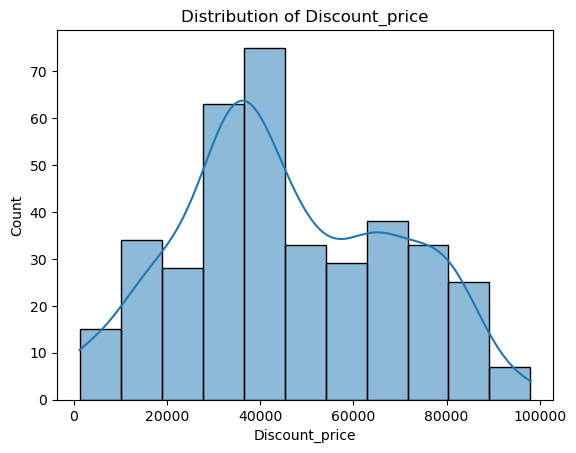

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Discount_price"],kde = True)
plt.title("Distribution of Discount_price")

In [30]:
df['Discount_price'].fillna(df['Discount_price'].median(), inplace=True)

C:\Users\szoya\AppData\Local\Temp\ipykernel_13968\3572570623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount_price'].fillna(df['Discount_price'].median(), inplace=True)
C:\Users\szoya\AppData\Local\Temp\ipykernel_13968\3572570623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discount_price'].fillna(df['Discount_price

<Axes: xlabel='Discount_price', ylabel='Count'>

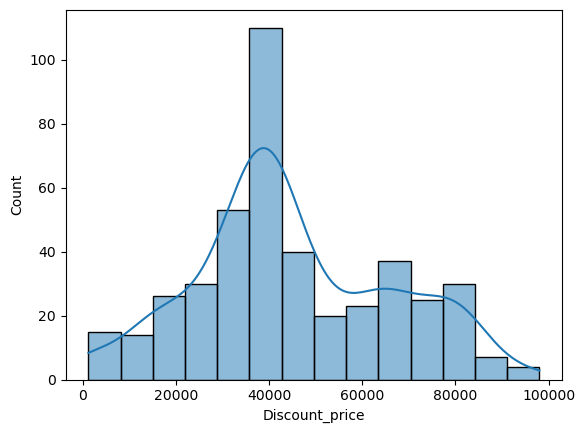

In [31]:
sns.histplot(df["Discount_price"],kde = True)

Text(0.5, 1.0, 'Distribution of original_price')

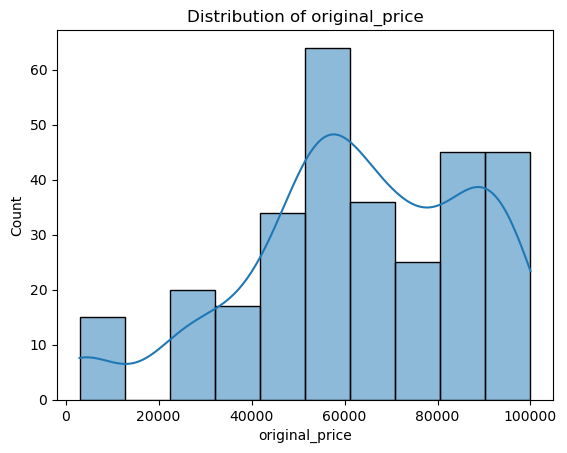

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["original_price"],kde = True)
plt.title("Distribution of original_price")

In [33]:
df['original_price'].fillna(df['original_price'].median(), inplace=True)

C:\Users\szoya\AppData\Local\Temp\ipykernel_13968\3763839581.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['original_price'].fillna(df['original_price'].median(), inplace=True)
C:\Users\szoya\AppData\Local\Temp\ipykernel_13968\3763839581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['original_price'].fillna(df['original_price

<Axes: xlabel='original_price', ylabel='Count'>

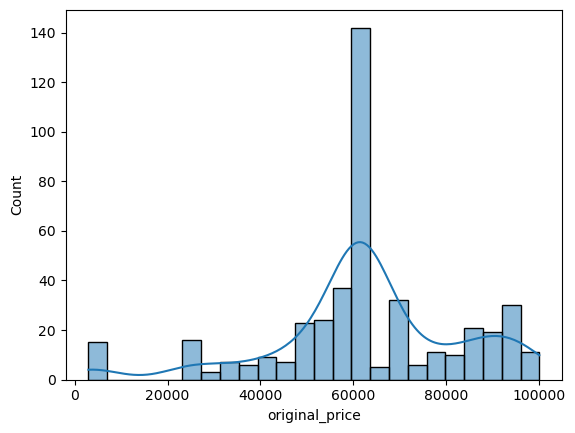

In [39]:
sns.histplot(df["original_price"],kde = True)

Text(0.5, 1.0, 'Distribution of Discount')

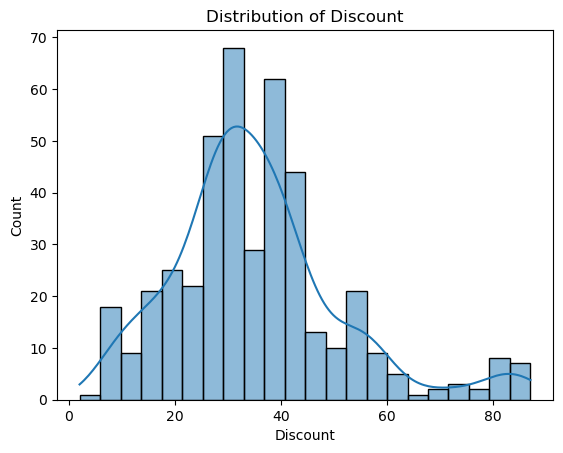

In [40]:
sns.histplot(df["Discount"],kde = True)
plt.title("Distribution of Discount")

In [42]:
df['Discount'].fillna(df['Discount'].median(), inplace=True)

C:\Users\szoya\AppData\Local\Temp\ipykernel_13968\2687537670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount'].fillna(df['Discount'].median(), inplace=True)
C:\Users\szoya\AppData\Local\Temp\ipykernel_13968\2687537670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discount'].fillna(df['Discount'].median(), inplace=Tru

<Axes: xlabel='Discount', ylabel='Count'>

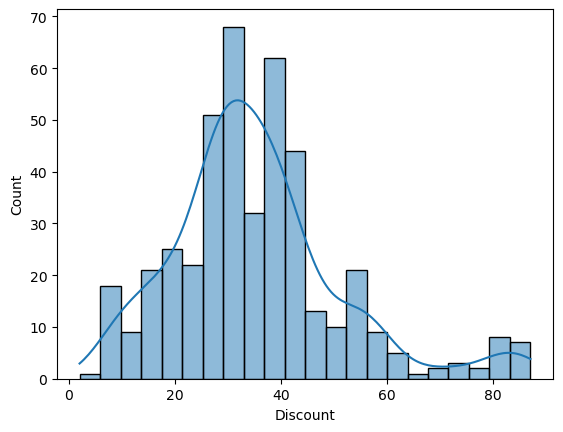

In [45]:
sns.histplot(df["Discount"],kde = True)

In [46]:
df.isnull().sum()

Brand                0
OS                  56
Storage_capacity    90
Discount_price       0
original_price       0
Discount             0
Rating               0
Num_of_rating        0
dtype: int64

In [49]:
df['OS'] = df.groupby('Brand')['OS'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

df['Storage_capacity'] = df.groupby('Brand')['Storage_capacity'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df['OS'].fillna('Unknown', inplace=True)
df['Storage_capacity'].fillna(0, inplace=True)

C:\Users\szoya\AppData\Local\Temp\ipykernel_13968\3699083589.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['OS'] = df.groupby('Brand')['OS'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\szoya\AppData\Local\Temp\ipykernel_13968\3699083589.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['OS'] = df.groupby('Brand')['OS'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\szoya\AppData\Local\Temp\ipykernel_13968\3699083589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [51]:
df.isnull().sum()

Brand               0
OS                  0
Storage_capacity    0
Discount_price      0
original_price      0
Discount            0
Rating              0
Num_of_rating       0
dtype: int64

In [53]:
brand = df["Brand"].value_counts().reset_index()
brand

,Brand,count
0,Lenovo,95
1,Acer,80
2,ASUS,61
3,HP,58
4,MSI,34
5,Dell,33
6,Apple,26
7,Mobilife,11
8,TABLE,7
9,HONOR,6


In [55]:
indices_to_drop = df[df['Brand'].isin(['(Renewed)', '[Smartchoice]'])].index

# Drop the rows using the drop() method
df = df.drop(indices_to_drop)

In [57]:
df

,Brand,OS,Storage_capacity,Discount_price,original_price,Discount,Rating,Num_of_rating
0,Acer,Windows 11,512GB,65990.0,89999.0,27.0,5.0,4
1,Acer,Windows 11,512GB,74990.0,62002.0,26.0,4.4,12
2,Acer,Windows 11,512GB,20819.0,33999.0,39.0,3.4,88
3,Dell,Windows 11,512GB,31990.0,48692.0,34.0,3.7,484
4,Lenovo,Windows 11,512GB,40990.0,62002.0,33.0,3.4,14
...,...,...,...,...,...,...,...,...
431,Dell,Windows 11,512GB,97990.0,62002.0,16.0,3.4,68
432,Lenovo,Windows 11,512GB,83990.0,62002.0,32.0,4.1,123
433,MSI,Windows 11,0,40990.0,62002.0,25.0,4.0,743
434,Lenovo,Windows 11,512GB,40990.0,62002.0,33.0,4.0,321


In [59]:
df.duplicated().sum()

1

In [61]:
df = df.drop_duplicates()

In [63]:
df.duplicated().sum()

0

In [65]:
df

,Brand,OS,Storage_capacity,Discount_price,original_price,Discount,Rating,Num_of_rating
0,Acer,Windows 11,512GB,65990.0,89999.0,27.0,5.0,4
1,Acer,Windows 11,512GB,74990.0,62002.0,26.0,4.4,12
2,Acer,Windows 11,512GB,20819.0,33999.0,39.0,3.4,88
3,Dell,Windows 11,512GB,31990.0,48692.0,34.0,3.7,484
4,Lenovo,Windows 11,512GB,40990.0,62002.0,33.0,3.4,14
...,...,...,...,...,...,...,...,...
431,Dell,Windows 11,512GB,97990.0,62002.0,16.0,3.4,68
432,Lenovo,Windows 11,512GB,83990.0,62002.0,32.0,4.1,123
433,MSI,Windows 11,0,40990.0,62002.0,25.0,4.0,743
434,Lenovo,Windows 11,512GB,40990.0,62002.0,33.0,4.0,321


In [71]:
df = df.dropna(how='any')

In [73]:
df

,Brand,OS,Storage_capacity,Discount_price,original_price,Discount,Rating,Num_of_rating
0,Acer,Windows 11,512GB,65990.0,89999.0,27.0,5.0,4
1,Acer,Windows 11,512GB,74990.0,62002.0,26.0,4.4,12
2,Acer,Windows 11,512GB,20819.0,33999.0,39.0,3.4,88
3,Dell,Windows 11,512GB,31990.0,48692.0,34.0,3.7,484
4,Lenovo,Windows 11,512GB,40990.0,62002.0,33.0,3.4,14
...,...,...,...,...,...,...,...,...
431,Dell,Windows 11,512GB,97990.0,62002.0,16.0,3.4,68
432,Lenovo,Windows 11,512GB,83990.0,62002.0,32.0,4.1,123
433,MSI,Windows 11,0,40990.0,62002.0,25.0,4.0,743
434,Lenovo,Windows 11,512GB,40990.0,62002.0,33.0,4.0,321


## UNIVARIATE Analysis

- **Continuous Variables:** Discount_price, original_price, Discount, Rating, and Num_of_rating
- **Categorical Variables:** Brand, OS, and Storage_capacity.

### Bar plot

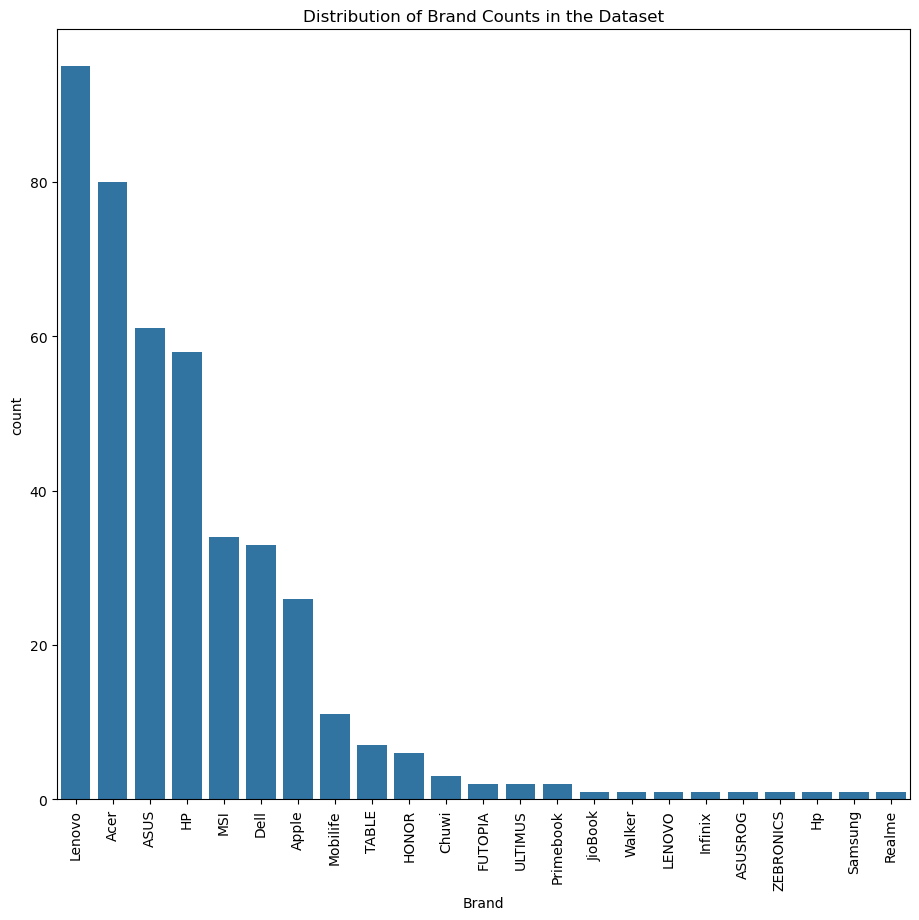

In [218]:
brand = df["Brand"].value_counts().reset_index()
brand

plt.figure(figsize=(11,10))
sns.barplot(brand ,x = "Brand",y = "count")
plt.xticks(rotation = 90)
plt.title('Distribution of Brand Counts in the Dataset')
plt.show()

#### **Insights:**
- The bar chart illustrates the frequency of laptops offered by different brands, Notably, **Lenovo**  has the highest number of laptops listed
- This shows that Lenovo is popular among customers and possibly higher consumer demand for that brand compared to other brands..
- It also indicates strong marketing efforts compared to other brands.

### Box plot (Discount)

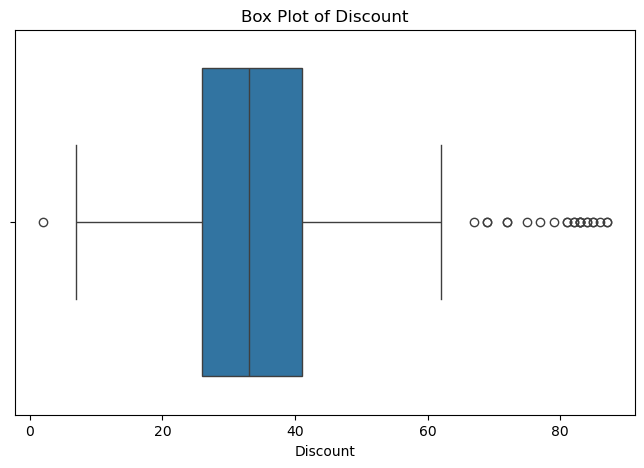

In [220]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Discount', data=df)
plt.title('Box Plot of Discount')
plt.show()

#### **Insights:**
- The discounts vary widely among laptops. Some have very high discounts, while others have lower ones.
- This suggests that, shoppers can find significant savings on certain models or brands
- This variability in discounts may attract customers who are looking for value deals.

### Pie chart (OS)

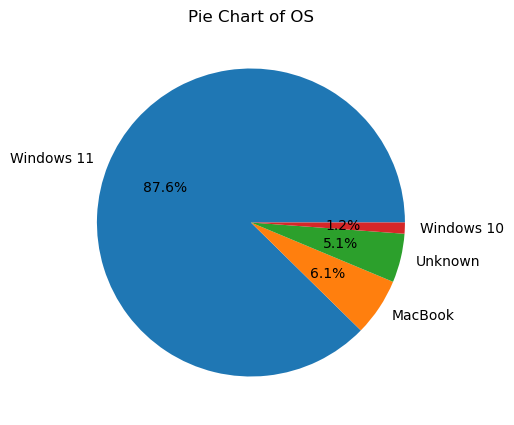

In [224]:
OS = df['OS'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(OS, labels=OS.index, autopct='%1.1f%%')
plt.title('Pie Chart of OS')
plt.show()

#### **Insights:**
- By looking at the pie chart we can say that windows 11 is more popular among other operating systems

### Pie chart (storage_capacity)

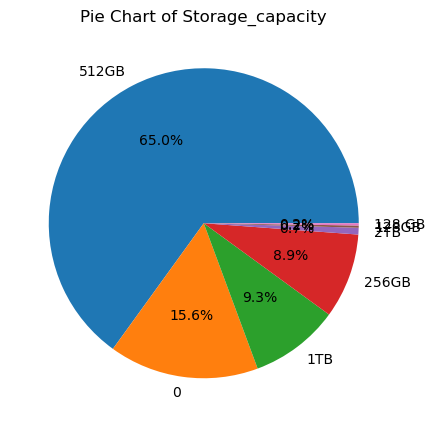

In [228]:
Storage_capacity = df['Storage_capacity'].value_counts()
plt.figure(figsize=(5,15))
plt.pie(Storage_capacity, labels=Storage_capacity.index, autopct='%1.1f%%')
plt.title('Pie Chart of Storage_capacity')
plt.show()

## BIVARIATE Analysis:

### 1. Continuous vs Categorical (Groupby, Pivot Table)

In [232]:
pivot_table = pd.pivot_table(df, values=['Discount_price', 'original_price', 'Rating'],
                             index=['Brand', 'OS'], aggfunc='mean')
pivot_table

Discount_price    Rating  original_price
Brand     OS                                                  
ASUS      Windows 11    42618.868852  3.944262    62454.983607
ASUSROG   Windows 11    78990.000000  4.100000    92999.000000
Acer      Windows 11    45192.837500  4.051250    59198.500000
Apple     MacBook       45285.653846  3.988462    66288.615385
Chuwi     Windows 11    57323.333333  3.966667    67330.333333
Dell      Windows 10    53490.000000  3.450000    76000.500000
          Windows 11    45041.774194  3.954839    64664.741935
FUTOPIA   Windows 11    40990.000000  4.300000    70490.000000
HONOR     Windows 11    37428.000000  4.016667    51340.666667
HP        Windows 11    46259.241379  3.993103    65446.241379
Hp        Windows 11    40990.000000  3.800000    62002.000000
Infinix   Windows 11    59199.000000  3.900000    68999.000000
JioBook   Unknown       59990.000000  4.600000    92900.000000
LENOVO    Unknown       81990.000000  5.000000    62002.000000
Lenovo    Windows 10    61490.000000  4.550000    62002.000000
          Windows 11    46797.021505  4.059140    65061.193548
MSI       Windows 11    41366.323529  3.870588    58364.794118
Mobilife  Unknown       44485.454545  4.054545    56319.272727
Primebook Unknown       24990.000000  4.150000    44195.000000
Realme    Windows 10    15240.000000  3.900000    24490.000000
Samsung   Windows 11    40990.000000  4.100000    62002.000000
TABLE     Unknown       40321.142857  4.142857    62696.428571
ULTIMUS   Windows 11    25740.000000  4.000000    37916.500000
Walker    Windows 11    34900.000000  4.100000    55190.000000
ZEBRONICS Windows 11    47990.000000  3.800000    80999.000000

### 2. Continuous vs Continuous

#### Scatter plot Discount Price vs. Original Price

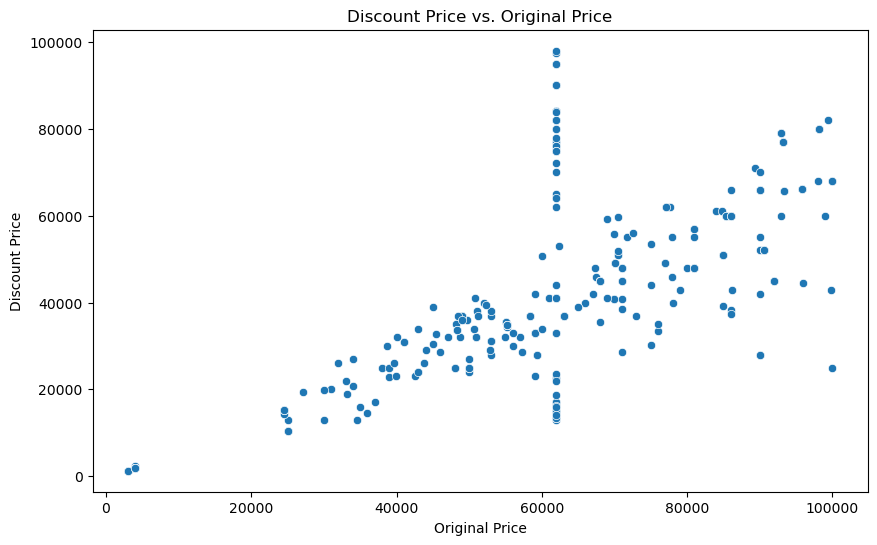

In [234]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='original_price', y='Discount_price', data=df)
plt.title('Discount Price vs. Original Price')
plt.xlabel('Original Price')
plt.ylabel('Discount Price')
plt.show()

#### **Insights:**
- The scatter plot showcases a positive correlation between original prices and discount prices.
- It indicates  that more expensive laptops usually have better discounts. It could be a strategy to attract buyers to pricier models by offering them at lower prices
- However, a few low-cost models also show significant discounts, indicating a diverse pricing strategy across the board.

### 3. Categorical vs Categorical 

In [243]:
crosstab_os = pd.crosstab(df['Brand'], df['OS'])
crosstab_os

OS,MacBook,Unknown,Windows 10,Windows 11
Brand,,,,
ASUS,0,0,0,61
ASUSROG,0,0,0,1
Acer,0,0,0,80
Apple,26,0,0,0
Chuwi,0,0,0,3
Dell,0,0,2,31
FUTOPIA,0,0,0,2
HONOR,0,0,0,6
HP,0,0,0,58


#### **Insights:**
- By the above crosstab we can see which laptop brand has which Operating system
- Also we get the count and type of the OS for each brand

## MULTIVARIATE Analysis:

#### Scatter plot of Original price vs Ratings

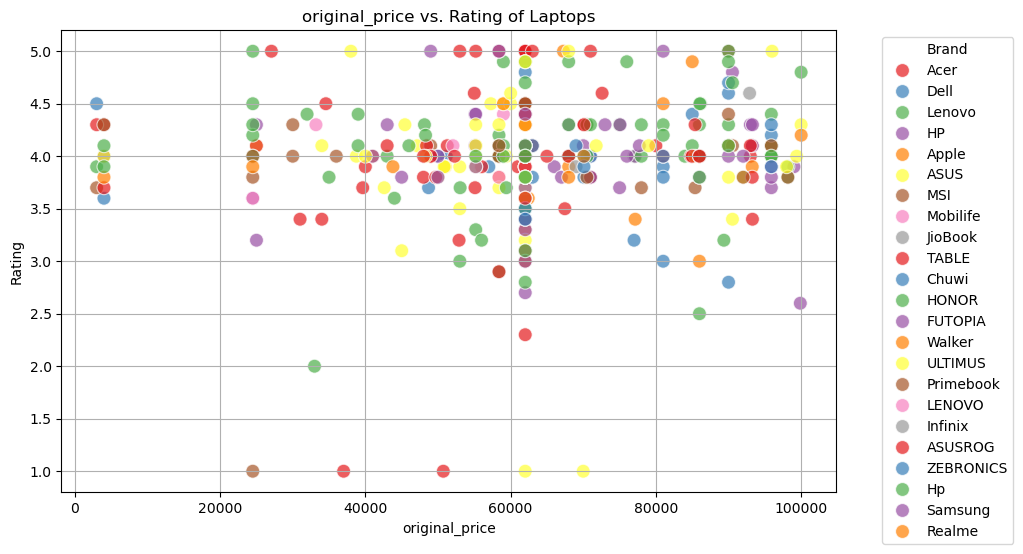

In [253]:
# Bivariate Plot: Scatter Plot of Price vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='original_price', y='Rating', data=df, hue='Brand', palette='Set1', s=100, alpha=0.7)
plt.title('original_price vs. Rating of Laptops')
plt.xlabel('original_price')
plt.ylabel('Rating')
plt.grid(True)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### **Insights:**
- The scatter plot shows the relationship between laptop prices and their ratings.
- We can see that laptops ranging from 40k - 80k tend to have higher ratings than other laptops

### Pair plot

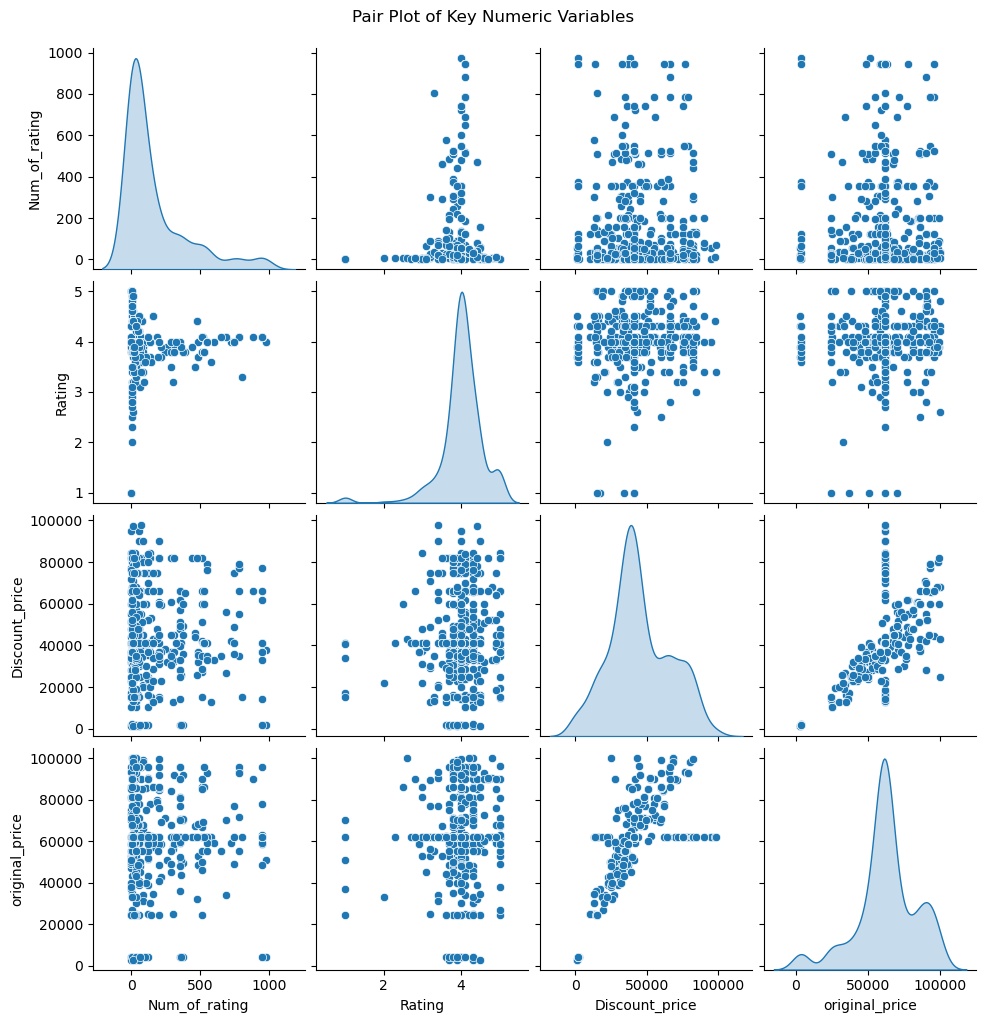

In [257]:
sns.pairplot(df[['Num_of_rating', 'Rating', 'Discount_price', 'original_price']], diag_kind='kde')
plt.suptitle('Pair Plot of Key Numeric Variables', y=1.02)
plt.show()

#### **Insights:**
- The pair plot visualizes relationships between several key numeric variables, allowing for insights into their interactions.
- The diagonal shows the distribution of same variables, while scatter plots on the off-diagonal provide insights into correlations.
- The positive correlation between Num_of_rating and Rating suggests ,When products have more ratings, they often get better average ratings and popular/good products get more ratings, which makes them even more popular.

### Heat map

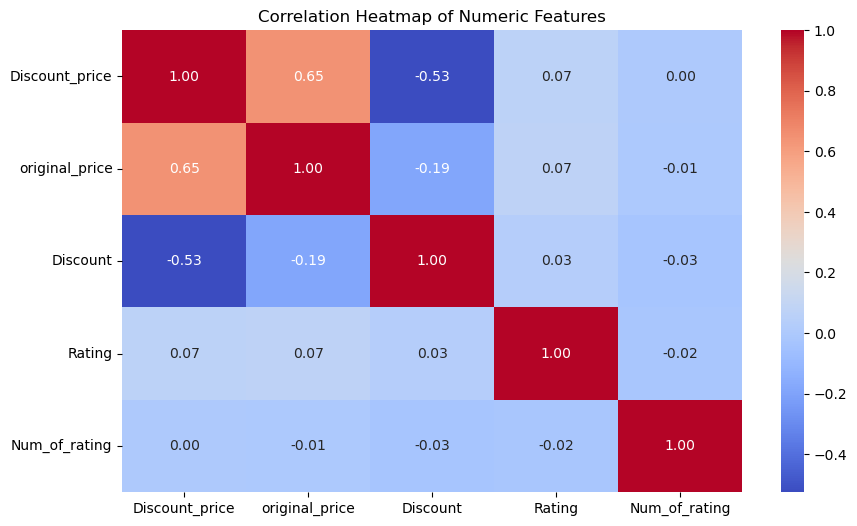

In [262]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

#### **Insights:**
- The correlation between Original_price and Discount_price is 0.65, it indicates a moderate positive relationship between these two variables.
- This suggests that as the original price of a laptop increases, the discount price also tends to increase.